In [31]:
#import dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import tree
import pandas as pd
import numpy as np
import os

In [32]:
# read data
fires_df = pd.read_csv("data/forestfires.csv")
fires_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [33]:
Xdata = fires_df.copy()

data_binary_encoded = pd.get_dummies(Xdata)
data_binary_encoded.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
X = data_binary_encoded.drop(columns=["area"])
y = fires_df["area"].values.reshape(-1,1)
print(X.shape, y.shape)

(517, 29) (517, 1)


In [35]:
fires_df.area = fires_df.area.astype(int)

In [36]:
target = fires_df["area"]
target.head()

0    0
1    0
2    0
3    0
4    0
Name: area, dtype: int64

In [37]:
data = data_binary_encoded.drop(columns=["area"], axis=1)
feature_names = data.columns
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [39]:
y_train.head()

446    0
515    0
154    1
25     0
265    0
Name: area, dtype: int64

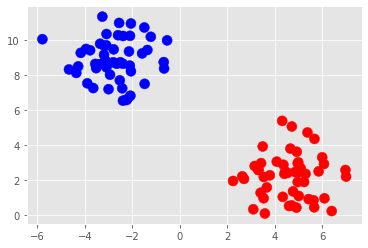

In [46]:
#Scatter Chart
X, y = make_blobs(centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [41]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
# applying grid search to use the model parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [50]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ................... C=1, gamma=0.0001, score=0.487, total=  48.8s
[CV] C=1, gamma=0.0001 ...............................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.8s remaining:    0.0s
[CV] ................... C=1, gamma=0.0001, score=0.500, total=  25.1s
[CV] C=1, gamma=0.0001 ...............................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[CV] ................... C=1, gamma=0.0001, score=0.455, total=  35.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.455, total=  29.8s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.494, tot

In [ ]:
# best parameters for data set 
print(grid.best_params_)

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print('Test Acc: %.3f' % grid.score(X_test, y_test))

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))